In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
import imutils
from skimage.feature import hog
from skimage import data, exposure

In [6]:
img = sorted(os.listdir("train"))
train_mask = sorted(os.listdir("train_mask"))
test_images = sorted(os.listdir("test"))
images = defaultdict(list)

In [21]:
for i in img:    
    train = cv2.imread("train/{}".format(i))
    fd, hog_image = hog(train, orientations=8, 
                        pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1),
                        block_norm='L2-Hys', 
                        visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    images['train_images'].append(hog_image_rescaled.ravel())
    images['train_images_path'].append(i)

In [22]:
for a in train_mask:
    train_mask_img = cv2.imread("train_mask/{}".format(a))
    fd, hog_image = hog(train_mask_img, orientations=8, 
                        pixels_per_cell=(16, 16), 
                        cells_per_block=(1, 1), 
                        block_norm='L2-Hys',
                        visualize=True)
    hog_image_rescaled2 = exposure.rescale_intensity(hog_image, in_range=(0, 10))     
    images['train_mask'].append(hog_image_rescaled2.ravel())
    images['train_mask_path'].append(a)

In [23]:
X = np.array(images['train_images'])
Y = np.array(images['train_mask'])
M = np.array(images['train_mask_path'])
T = np.array(images['train_images_path'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, T, random_state=0)
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100,100],
                    alpha=0.1, activation="relu",
                    learning_rate_init=0.7, random_state=0)

mlp.fit(X_train, y_train)
print(X.shape)
print(Y.shape)
print(T.shape)

(1511, 76800)
(1511, 76800)
(1511,)


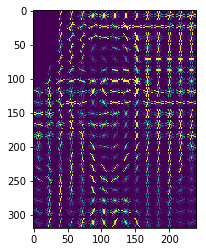

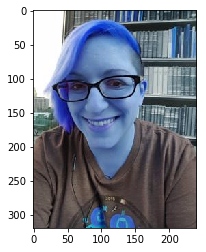

In [75]:
predict_img = cv2.imread("train/{}".format(T[1110]))
fd, hog_image4 = hog(predict_img, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1),block_norm='L2-Hys', visualize=True, multichannel=True)
hog22 = exposure.rescale_intensity(hog_image4, in_range=(0, 10))
plt.imshow(hog22)
plt.show() 
plt.imshow(predict_img)
plt.show() 

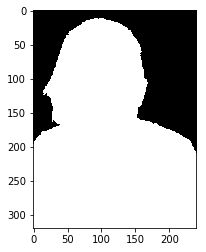

In [107]:
predict = mlp.predict([hog22.ravel()])
pred_img = cv2.imread("train_mask/{}".format(predict[0].replace(".jpg",".png")))
plt.imshow(pred_img)
plt.show()